# 04_06_snakemake.ipynb - Scientific workflows with Snakemake

In [ ]:
%pip install snakemake

In [2]:
%%file Snakefile

events = ['GW170817-v3', 'GW190521_074359-v1', 'GW190814-v2', 'GW190412-v3',
          'GW190828_063405-v1', 'GW170814-v3', 'GW170608-v3', 'GW190408_181802-v1',
          'GW190521-v3']

rule stack:
    input:
        expand("events/{id}.png", id=events)
    output:
        "events/allevents.png"
    run:
        from PIL import Image
        import numpy as np
        
        # load all images to numpy arrays
        images = [np.array(Image.open(imagefile)) for imagefile in input]
        # stack the arrays vertically
        stacked = np.vstack(images)
        # convert stacked array to PIL image, then save 
        Image.fromarray(stacked).save(output[0])

rule plot:
    input:
        "events/{id}.json"
    output:
        "events/{id}.png"
    shell:
        "python plotsignal.py {wildcards.id} -C events"
        
rule download:
    output:
        "events/{id}.json"
    shell:
        "python hdfdownload.py {wildcards.id} -C events"

Overwriting Snakefile


In [3]:
!snakemake -j 1 events/GW150914-v3.json

Assuming unrestricted shared filesystem usage.
host: codespaces-62e845
Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).


In [4]:
!snakemake -j 1 events/GW170817-v3.png

Assuming unrestricted shared filesystem usage.
host: codespaces-62e845
Building DAG of jobs...
Using shell: /usr/bin/bash
Provided cores: 1 (use --cores to define parallelism)
Rules claiming more threads will be scaled down.
Job stats:
job         count
--------  -------
download        1
plot            1
total           2

Select jobs to execute...
Execute 1 jobs...

[Thu Jul 24 12:59:40 2025]
localrule download:
    output: events/GW170817-v3.json
    jobid: 1
    reason: Missing output files: events/GW170817-v3.json
    wildcards: id=GW170817-v3
    resources: tmpdir=/tmp
[Thu Jul 24 12:59:48 2025]
Finished jobid: 1 (Rule: download)
1 of 2 steps (50%) done
Select jobs to execute...
Execute 1 jobs...

[Thu Jul 24 12:59:48 2025]
localrule plot:
    input: events/GW170817-v3.json
    output: events/GW170817-v3.png
    jobid: 0
    reason: Missing output files: events/GW170817-v3.png; Input files updated by another job: events/GW170817-v3.json
    wildcards: id=GW170817-v3
    resource

In [5]:
!snakemake -n

host: codespaces-62e845
Building DAG of jobs...
Job stats:
job         count
--------  -------
download        8
plot            8
stack           1
total          17


[Thu Jul 24 13:01:30 2025]
rule download:
    output: events/GW190814-v2.json
    jobid: 6
    reason: Missing output files: events/GW190814-v2.json
    wildcards: id=GW190814-v2
    resources: tmpdir=<TBD>
[Thu Jul 24 13:01:30 2025]
rule download:
    output: events/GW170814-v3.json
    jobid: 12
    reason: Missing output files: events/GW170814-v3.json
    wildcards: id=GW170814-v3
    resources: tmpdir=<TBD>
[Thu Jul 24 13:01:30 2025]
rule download:
    output: events/GW190828_063405-v1.json
    jobid: 10
    reason: Missing output files: events/GW190828_063405-v1.json
    wildcards: id=GW190828_063405-v1
    resources: tmpdir=<TBD>
[Thu Jul 24 13:01:30 2025]
rule download:
    output: events/GW190408_181802-v1.json
    jobid: 16
    reason: Missing output files: events/GW190408_181802-v1.json
    wildcards: id=GW190

In [6]:
!snakemake -j 4

Assuming unrestricted shared filesystem usage.
host: codespaces-62e845
Building DAG of jobs...
Using shell: /usr/bin/bash
Provided cores: 4
Rules claiming more threads will be scaled down.
Job stats:
job         count
--------  -------
download        8
plot            8
stack           1
total          17

Select jobs to execute...
Execute 4 jobs...

[Thu Jul 24 13:02:35 2025]
localrule download:
    output: events/GW190814-v2.json
    jobid: 6
    reason: Missing output files: events/GW190814-v2.json
    wildcards: id=GW190814-v2
    resources: tmpdir=/tmp
[Thu Jul 24 13:02:35 2025]
localrule download:
    output: events/GW190408_181802-v1.json
    jobid: 16
    reason: Missing output files: events/GW190408_181802-v1.json
    wildcards: id=GW190408_181802-v1
    resources: tmpdir=/tmp
[Thu Jul 24 13:02:35 2025]
localrule download:
    output: events/GW170814-v3.json
    jobid: 12
    reason: Missing output files: events/GW170814-v3.json
    wildcards: id=GW170814-v3
    resources: tm

In [ ]:
# on Windows !start events/allevents.png
!open events/allevents.png

/bin/bash: line 1: xdg-open: command not found


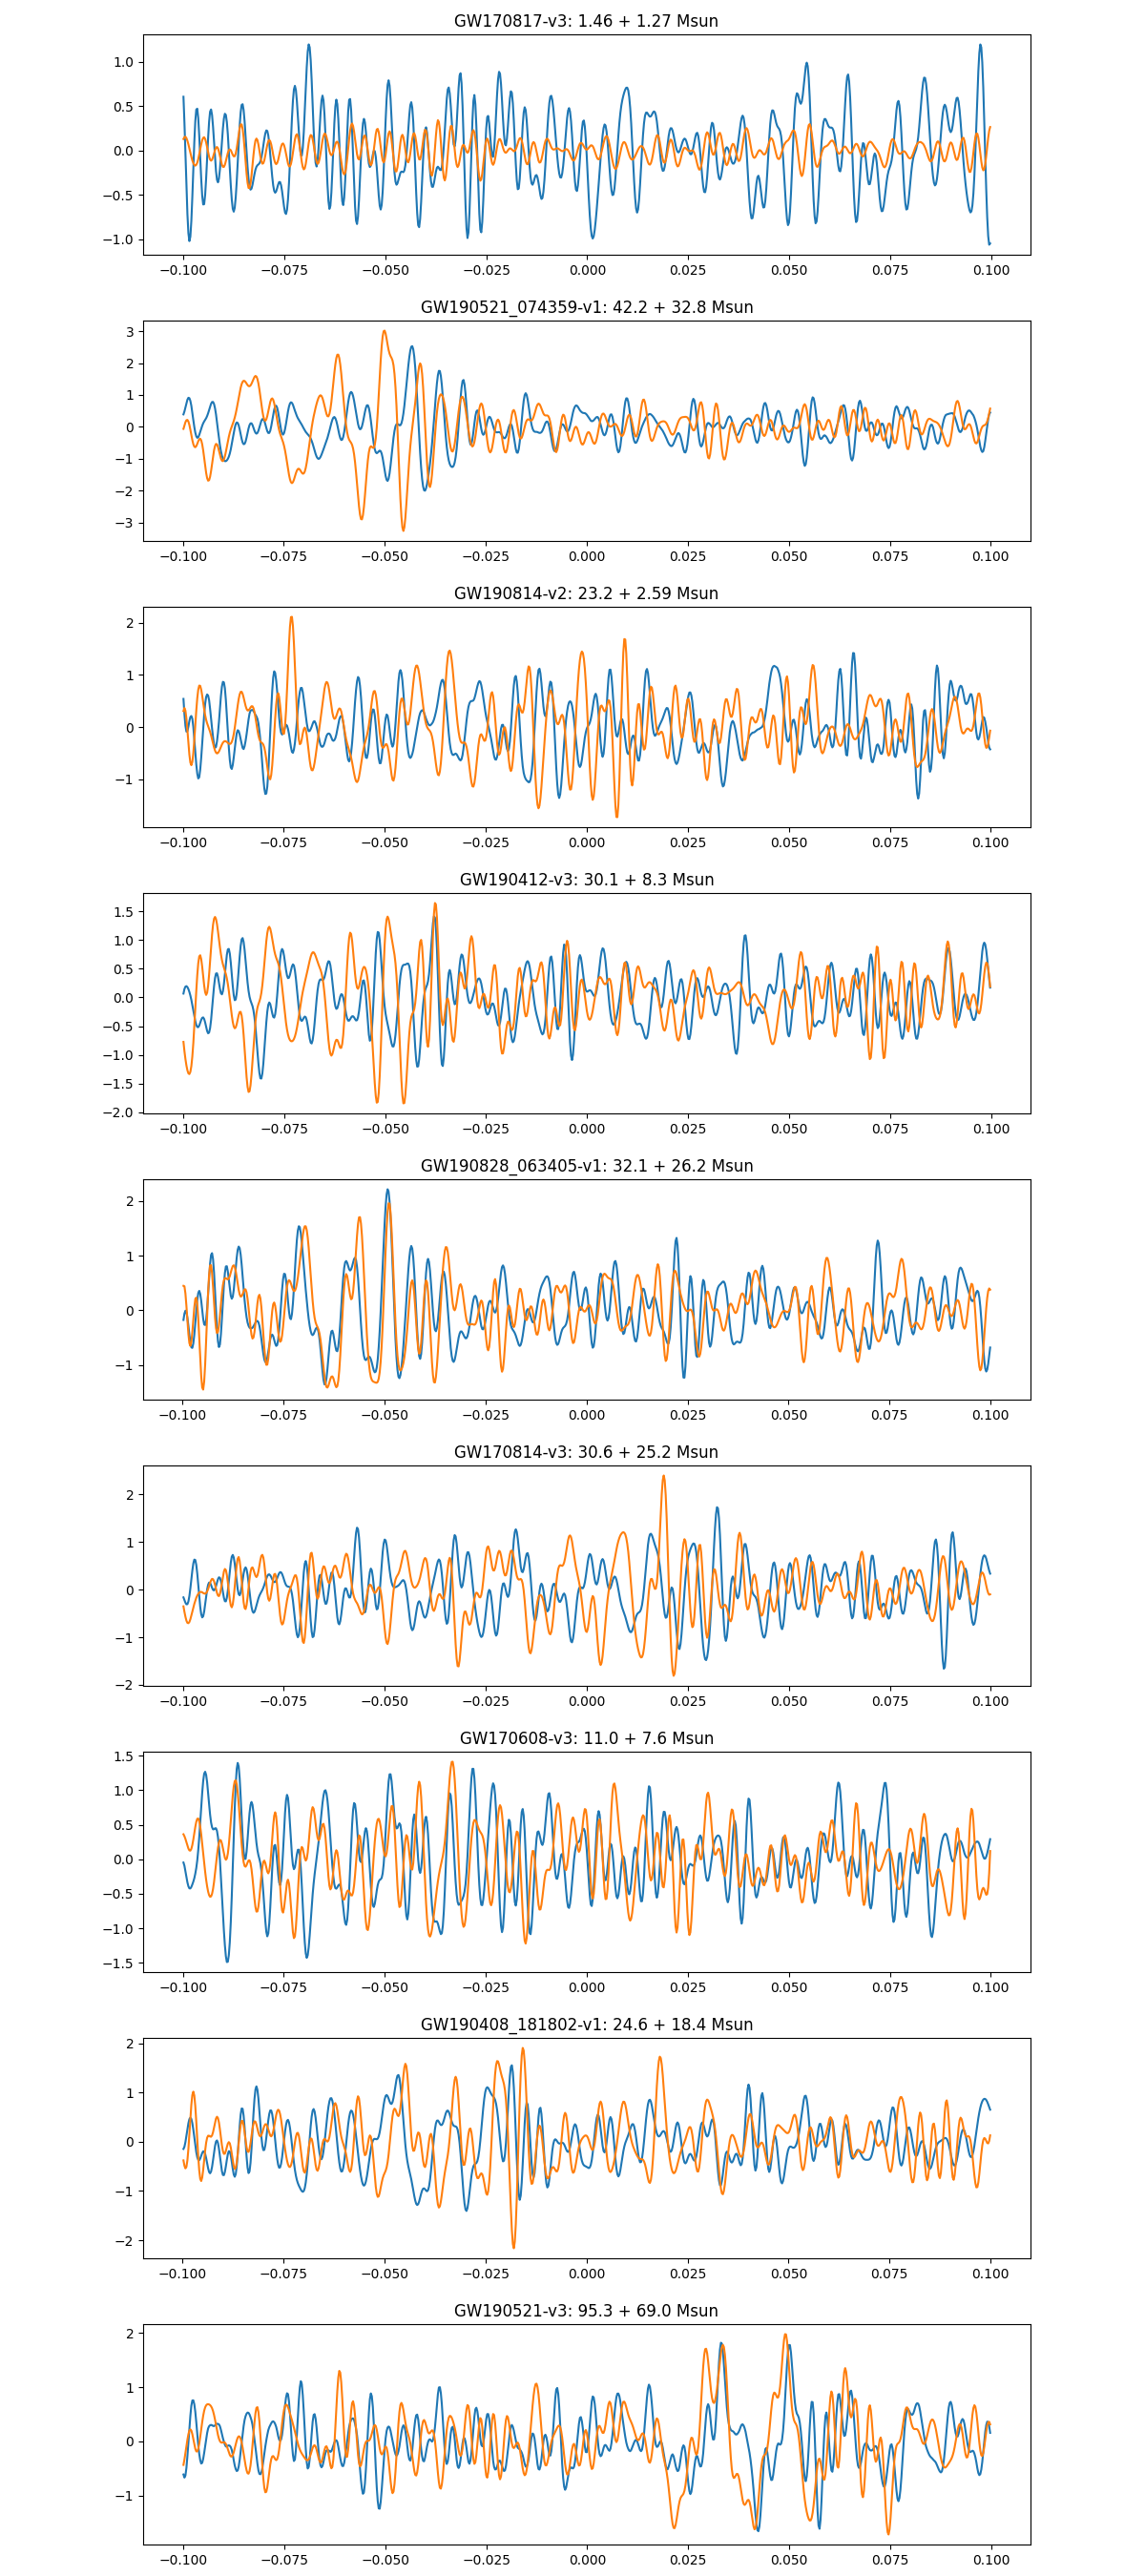

In [9]:
from IPython.display import Image, display
display(Image(filename="events/allevents.png"))